In [1]:
print("Hello World!")

Hello World!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from collections import Counter
import plotly.express as px
from sklearn.cluster import DBSCAN

# Load Data

In [3]:
# Load the actual Excel file
excel_file_path = r"C:\Desktop\UK Based Retail Analytics\online+retail\Online Retail.xlsx"  
excel_data = pd.ExcelFile(excel_file_path)


In [4]:
# Load each sheet into a separate DataFrame
online_retail = excel_data.parse(sheet_name='Online Retail')  


## Data Overview


In [5]:
online_retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [6]:
online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
online_retail.shape

(541909, 8)

In [8]:
online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
# Check for missing values
print(online_retail.isnull().sum())

# View unique values in categorical columns
print(online_retail['Country'].nunique(), "unique countries.")
print(online_retail['Description'].nunique(), "unique product descriptions.")


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
38 unique countries.
4223 unique product descriptions.


### Creating Sales Column

In [10]:
# Create a new column for sales (total revenue per row)
online_retail['Sales'] = online_retail['Quantity'] * online_retail['UnitPrice']

# Rename the 'Sales' column to 'Sales(£)' to include the pound sign in the column header
online_retail = online_retail.rename(columns={'Sales': 'Sales(£)'})

online_retail = online_retail.rename(columns={'UnitPrice': 'UnitPrice(£)'})

# Display the first few rows of the updated DataFrame
online_retail.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice(£),CustomerID,Country,Sales(£)
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [11]:
print(online_retail.isnull().sum())


InvoiceNo            0
StockCode            0
Description       1454
Quantity             0
InvoiceDate          0
UnitPrice(£)         0
CustomerID      135080
Country              0
Sales(£)             0
dtype: int64


### Handling Missing Values


InvoiceNo        0.000000
StockCode        0.000000
Description      0.268311
Quantity         0.000000
InvoiceDate      0.000000
UnitPrice(£)     0.000000
CustomerID      24.926694
Country          0.000000
Sales(£)         0.000000
dtype: float64


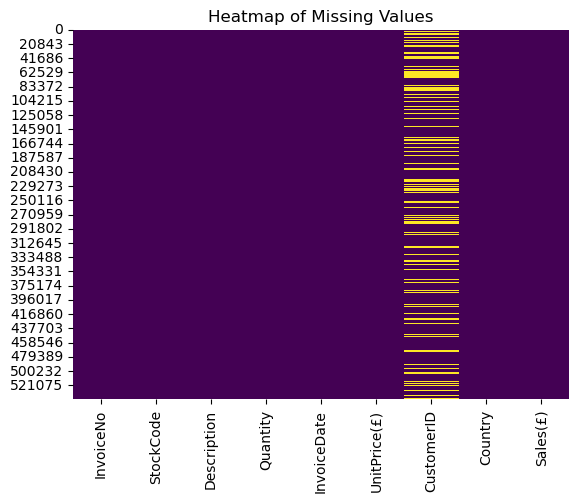

In [12]:
# Percentage of missing values in each column
missing_percentage = online_retail.isnull().mean() * 100
print(missing_percentage)

# Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(online_retail.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values")
plt.show()



In [13]:
# Dropping rows with missing CustomerID
online_retail_cleaned = online_retail.dropna(subset=['CustomerID'])

In [14]:
online_retail_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     406829 non-null  object        
 1   StockCode     406829 non-null  object        
 2   Description   406829 non-null  object        
 3   Quantity      406829 non-null  int64         
 4   InvoiceDate   406829 non-null  datetime64[ns]
 5   UnitPrice(£)  406829 non-null  float64       
 6   CustomerID    406829 non-null  float64       
 7   Country       406829 non-null  object        
 8   Sales(£)      406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


###  Extract Temporal Features

In [15]:
# Extract temporal features
online_retail_cleaned['InvoiceMonth'] = online_retail_cleaned['InvoiceDate'].dt.month
online_retail_cleaned['InvoiceDay'] = online_retail_cleaned['InvoiceDate'].dt.day
online_retail_cleaned['InvoiceHour'] = online_retail_cleaned['InvoiceDate'].dt.hour
online_retail_cleaned['InvoiceWeekday'] = online_retail_cleaned['InvoiceDate'].dt.weekday  # 0 = Monday, 6 = Sunday


C:\Users\godwi\AppData\Local\Temp\ipykernel_17996\2584983549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_retail_cleaned['InvoiceMonth'] = online_retail_cleaned['InvoiceDate'].dt.month
C:\Users\godwi\AppData\Local\Temp\ipykernel_17996\2584983549.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_retail_cleaned['InvoiceDay'] = online_retail_cleaned['InvoiceDate'].dt.day
C:\Users\godwi\AppData\Local\Temp\ipykernel_17996\2584983549.py:4: SettingWithCopyWarning: 
A value is trying to be se

### Handling Cancellations( Canceled transaction with InvoiceNo starting with "C")


In [16]:
# Correct the creation of is_canceled column
online_retail_cleaned['is_canceled'] = online_retail_cleaned['InvoiceNo'].str.startswith('C').fillna(False)

# Seperte canceled transaction from non-canceled ones
online_retail_cleaned_no_cancellations = online_retail_cleaned[~online_retail_cleaned['is_canceled']]


C:\Users\godwi\AppData\Local\Temp\ipykernel_17996\3087353913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_retail_cleaned['is_canceled'] = online_retail_cleaned['InvoiceNo'].str.startswith('C').fillna(False)


In [17]:
# Export the cleaned data (without cancellations) to a CSV file
#online_retail_cleaned_no_cancellations.to_csv('online_retail_cleaned_no_cancellations.csv', index=False)

print("Data exported successfully to 'online_retail_cleaned_no_cancellations.csv'")


Data exported successfully to 'online_retail_cleaned_no_cancellations.csv'


In [18]:
online_retail_cleaned_no_cancellations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InvoiceNo       397924 non-null  object        
 1   StockCode       397924 non-null  object        
 2   Description     397924 non-null  object        
 3   Quantity        397924 non-null  int64         
 4   InvoiceDate     397924 non-null  datetime64[ns]
 5   UnitPrice(£)    397924 non-null  float64       
 6   CustomerID      397924 non-null  float64       
 7   Country         397924 non-null  object        
 8   Sales(£)        397924 non-null  float64       
 9   InvoiceMonth    397924 non-null  int32         
 10  InvoiceDay      397924 non-null  int32         
 11  InvoiceHour     397924 non-null  int32         
 12  InvoiceWeekday  397924 non-null  int32         
 13  is_canceled     397924 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(3)

In [19]:
## Canceled Transaction
# Filter for canceled transactions
canceled_transactions = online_retail_cleaned[online_retail_cleaned['is_canceled']][['is_canceled', 'Quantity',"Description", "InvoiceDate",'CustomerID', 'Country']]

# Display the first few rows of the canceled transactions DataFrame
canceled_transactions.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8905 entries, 141 to 541717
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   is_canceled  8905 non-null   bool          
 1   Quantity     8905 non-null   int64         
 2   Description  8905 non-null   object        
 3   InvoiceDate  8905 non-null   datetime64[ns]
 4   CustomerID   8905 non-null   float64       
 5   Country      8905 non-null   object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 426.1+ KB


In [20]:
canceled_transactions.head()

,is_canceled,Quantity,Description,InvoiceDate,CustomerID,Country
141,True,-1,Discount,2010-12-01 09:41:00,14527.0,United Kingdom
154,True,-1,SET OF 3 COLOURED FLYING DUCKS,2010-12-01 09:49:00,15311.0,United Kingdom
235,True,-12,PLASTERS IN TIN CIRCUS PARADE,2010-12-01 10:24:00,17548.0,United Kingdom
236,True,-24,PACK OF 12 PINK PAISLEY TISSUES,2010-12-01 10:24:00,17548.0,United Kingdom
237,True,-24,PACK OF 12 BLUE PAISLEY TISSUES,2010-12-01 10:24:00,17548.0,United Kingdom


### 4. Checking for Duplicates


In [21]:
# Check for duplicates
print(f"Number of duplicate rows: {online_retail_cleaned.duplicated().sum()}")


Number of duplicate rows: 5225


###  Outlier Detection


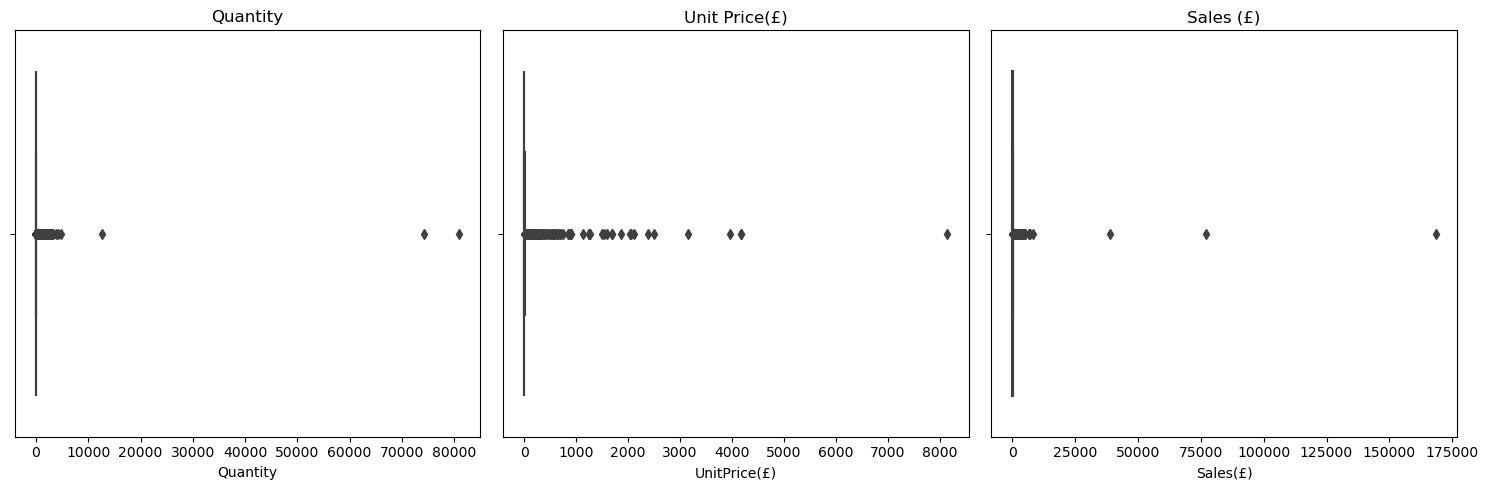

In [22]:
# Boxplots to identify outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(ax=axes[0], x=online_retail_cleaned_no_cancellations['Quantity'])
axes[0].set_title("Quantity")

sns.boxplot(ax=axes[1], x=online_retail_cleaned_no_cancellations['UnitPrice(£)'])
axes[1].set_title("Unit Price(£)")

sns.boxplot(ax=axes[2], x=online_retail_cleaned_no_cancellations['Sales(£)'])
axes[2].set_title("Sales (£)")

plt.tight_layout()
plt.show()


### Removing Outliers


##### Using the IQR method:



In [23]:
# Calculate IQR for each feature
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for Quantity, UnitPrice(£), and Sales(£)
online_retail_cleaned_no_cancellations_no_outliers = online_retail_cleaned_no_cancellations.copy()
online_retail_cleaned_no_cancellations_no_outliers = remove_outliers(online_retail_cleaned_no_cancellations_no_outliers, 'Quantity')
online_retail_cleaned_no_cancellations_no_outliers = remove_outliers(online_retail_cleaned_no_cancellations_no_outliers, 'UnitPrice(£)')
online_retail_cleaned_no_cancellations_no_outliers = remove_outliers(online_retail_cleaned_no_cancellations_no_outliers, 'Sales(£)')

# Display the cleaned DataFrame
online_retail_cleaned_no_cancellations_no_outliers.info()



<class 'pandas.core.frame.DataFrame'>
Index: 324747 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InvoiceNo       324747 non-null  object        
 1   StockCode       324747 non-null  object        
 2   Description     324747 non-null  object        
 3   Quantity        324747 non-null  int64         
 4   InvoiceDate     324747 non-null  datetime64[ns]
 5   UnitPrice(£)    324747 non-null  float64       
 6   CustomerID      324747 non-null  float64       
 7   Country         324747 non-null  object        
 8   Sales(£)        324747 non-null  float64       
 9   InvoiceMonth    324747 non-null  int32         
 10  InvoiceDay      324747 non-null  int32         
 11  InvoiceHour     324747 non-null  int32         
 12  InvoiceWeekday  324747 non-null  int32         
 13  is_canceled     324747 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(3)

In [24]:
# Export the cleaned DataFrame to be used for clustering
output_path = 'cleaned_online_retail_data_no_cancellations_no_outliers_for_clustering.csv'
online_retail_cleaned_no_cancellations_no_outliers.to_csv(output_path, index=False)

print(f"Cleaned data exported successfully to: {output_path}")

Cleaned data exported successfully to: cleaned_online_retail_data_no_cancellations_no_outliers_for_clustering.csv


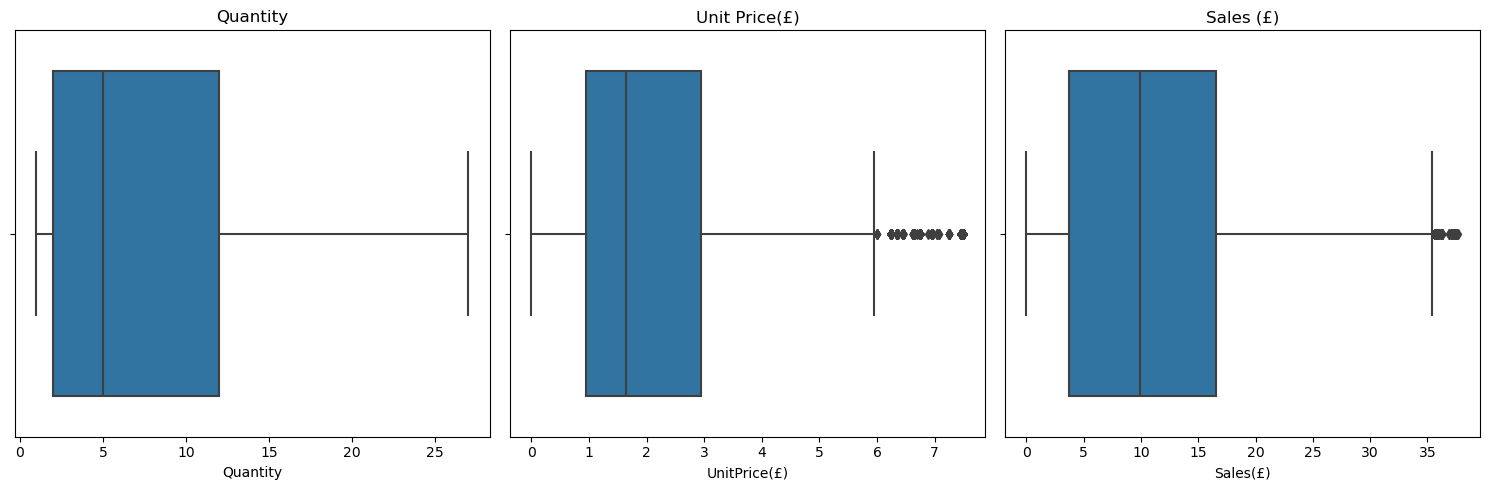

In [25]:
# Boxplots to identify outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(ax=axes[0], x=online_retail_cleaned_no_cancellations_no_outliers['Quantity'])
axes[0].set_title("Quantity")

sns.boxplot(ax=axes[1], x=online_retail_cleaned_no_cancellations_no_outliers['UnitPrice(£)'])
axes[1].set_title("Unit Price(£)")

sns.boxplot(ax=axes[2], x=online_retail_cleaned_no_cancellations_no_outliers['Sales(£)'])
axes[2].set_title("Sales (£)")

plt.tight_layout()
plt.show()


In [26]:
online_retail_cleaned_no_cancellations_no_outliers.shape

(324747, 14)

## EDA

### 1. Seasonal Sales Trends


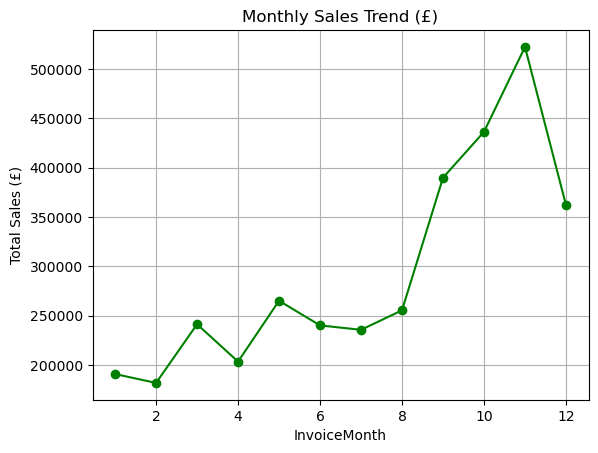

In [54]:
## Extract temporal features from InvoiceDate for seasonal trends.

# Monthly sales trend
monthly_sales = online_retail_cleaned_no_cancellations_no_outliers.groupby('InvoiceMonth')['Sales(£)'].sum()
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title("Monthly Sales Trend (£)")
plt.ylabel("Total Sales (£)")
plt.xlabel("InvoiceMonth")
plt.grid("both")
plt.show()


FINDING: The highest sales were recorded in November (last quarter of the year), while February (first quarter) experienced the lowest sales.


REASON: This trend can likely be attributed to the Christmas season. During this period, people tend to spend more on decorating their homes and purchasing gifts for loved ones. These behaviors typically lead to increased sales during November, while February sees lower sales due to the post-holiday slowdown.


RECOMMDATION: To capitalize on this trend, businesses could ramp up marketing efforts and promotions ahead of the holiday season (October-November), offering early discounts or bundling offers for the festive period.

### 2. Daily Sales Trends


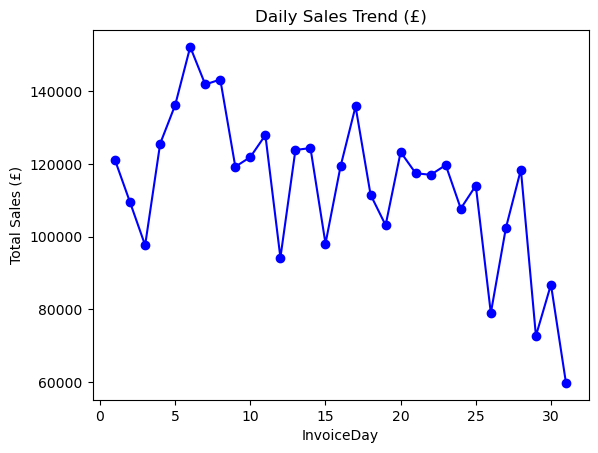

In [55]:

# Daily sales trend
InvoiceDaily_sales = online_retail_cleaned_no_cancellations_no_outliers.groupby('InvoiceDay')['Sales(£)'].sum()
InvoiceDaily_sales.plot(kind='line', marker='o', color='blue')
plt.title("Daily Sales Trend (£)")
plt.ylabel("Total Sales (£)")
plt.xlabel("InvoiceDay")
plt.show()


Finding: Sales are highest during the first week of the month, specifically on the 6th day, and decline as the month progresses, with the 31st being the lowest sales day.


Reason: This pattern might be linked to customer behavior. Many people receive their paychecks early in the month, leading to a spike in purchases. As the month goes on, spending likely decreases as consumers exhaust their disposable income.



Recommendation: Promotions or discounts can be targeted for the first week of the month to align with customers’ increased spending power. Similarly, creating incentives towards the end of the month could help boost sales on the 31st.


### 3. Hourly Sales Trends


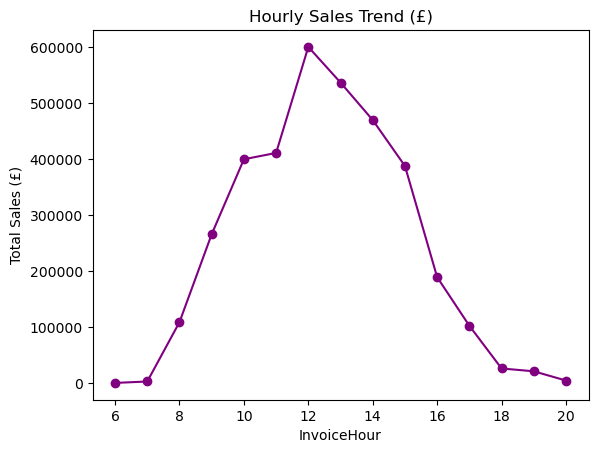

In [56]:

# Hourly sales trend
InvoiceHourly_sales = online_retail_cleaned_no_cancellations_no_outliers.groupby('InvoiceHour')['Sales(£)'].sum()
InvoiceHourly_sales.plot(kind='line', marker='o', color='purple')
plt.title("Hourly Sales Trend (£)")
plt.ylabel("Total Sales (£)")
plt.xlabel("InvoiceHour")
plt.show()


Finding: All transactions occurred between 6 am and 8 pm, with 12 noon being the peak hour for sales.


Reason: This indicates that customers prefer shopping during daylight hours. The peak around noon could be due to lunchtime shopping, where customers make purchases during breaks from work or leisure.


Recommendation: Consider scheduling promotions or special offers around lunchtime (12 pm) to maximize sales during this peak time.

### 4. Weekday Sales Trends


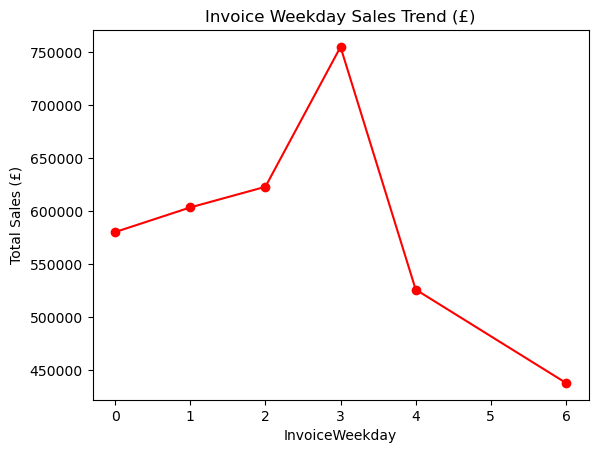

In [30]:

# Weekday sales trend
InvoiceHourly_sales = online_retail_cleaned_no_cancellations_no_outliers.groupby('InvoiceWeekday')['Sales(£)'].sum()
InvoiceHourly_sales.plot(kind='line', marker='o', color='red')
plt.title("Invoice Weekday Sales Trend (£)")
plt.ylabel("Total Sales (£)")
plt.xlabel("InvoiceWeekday")
plt.show()


Finding: Most transactions occurred during the weekdays rather than weekends. Thursday saw the highest sales, and Sunday had the lowest, with no sales recorded on Saturday.


Reason: People are more likely to engage in shopping during weekdays due to work schedules and weekday promotions. Saturday's lack of sales could be due to competing weekend activities or the start of personal leisure time.


Recommendation: To improve sales on Saturdays, consider offering weekend-exclusive deals or promoting Saturday-only discounts to capture customers who typically shop during weekdays.


### 5. Top Products by Quantity vs. Revenue


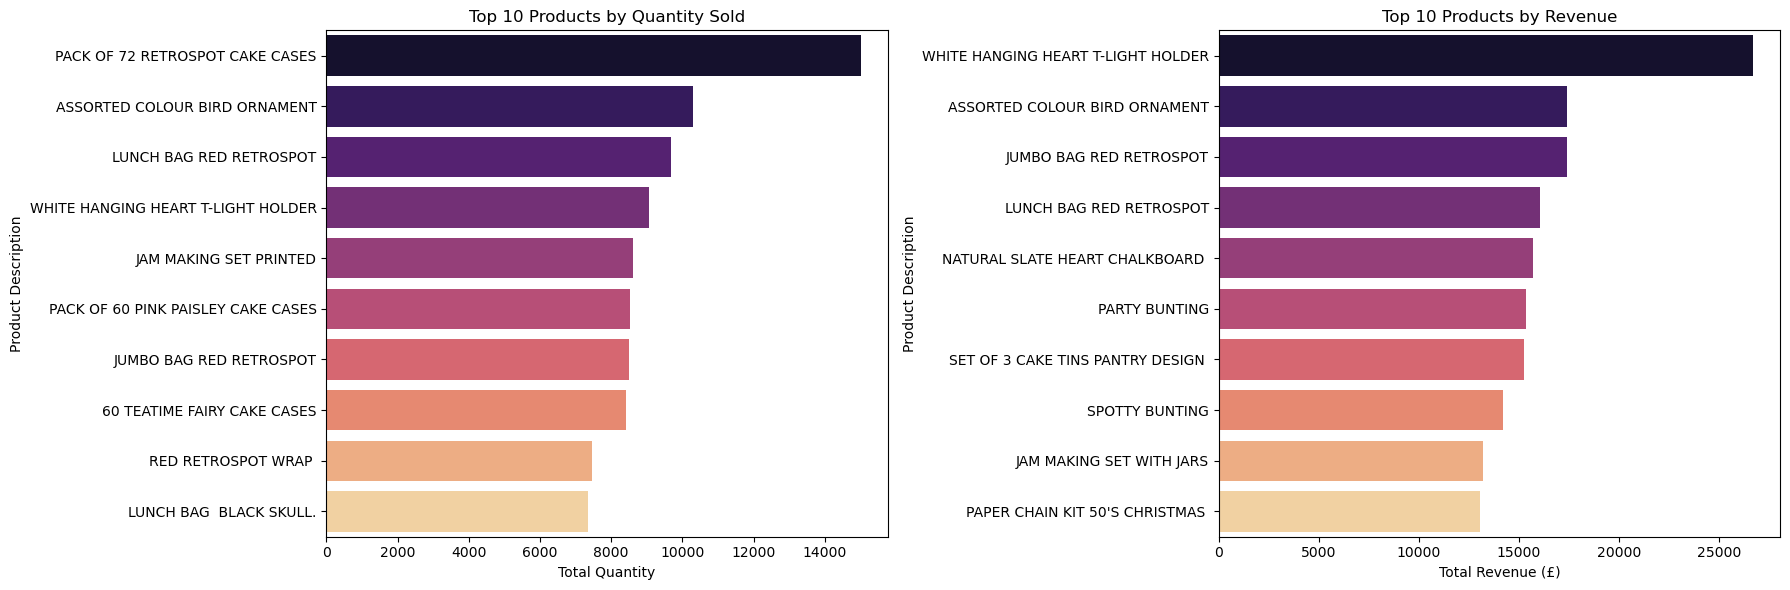

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Description' to calculate total quantity and total revenue for each product
product_summary = online_retail_cleaned_no_cancellations_no_outliers.groupby('Description').agg({
    'Quantity': 'sum',
    'Sales(£)': 'sum'
}).reset_index()

# Top 10 most sold products (by quantity)
top_products_by_quantity = product_summary.sort_values(by='Quantity', ascending=False).head(10)

# Top 10 highest revenue-generating products
top_products_by_revenue = product_summary.sort_values(by='Sales(£)', ascending=False).head(10)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Top Products by Quantity
sns.barplot(ax=axes[0], data=top_products_by_quantity, x='Quantity', y='Description', palette='magma')
axes[0].set_title('Top 10 Products by Quantity Sold')
axes[0].set_xlabel('Total Quantity')
axes[0].set_ylabel('Product Description')

# Top Products by Revenue
sns.barplot(ax=axes[1], data=top_products_by_revenue, x='Sales(£)', y='Description', palette='magma')
axes[1].set_title('Top 10 Products by Revenue')
axes[1].set_xlabel('Total Revenue (£)')
axes[1].set_ylabel('Product Description')

plt.tight_layout()
plt.show()


Finding: The top-selling product by quantity was PACK OF 72 RETROSPOT CAKE CASES, while the highest revenue-generating product was WHITE HANGING HEART T-LIGHT HOLDER.


Reason: This difference is due to the unit price difference between the products. While the cake cases sold in large quantities, the T-light holders had a higher price point, contributing more to overall revenue.


Recommendation: It's important to recognize both high-quantity and high-revenue products. Promotional strategies should focus on low-cost, high-quantity items to drive volume, while higher-priced items can be marketed as premium products.

### 6. Customer Spending Categories


In [32]:
"""""

1. Revenue by Country: Identifying which countries contribute the most to revenue.
2. Average Spending per Customer by Country: Analyzing how much customers in each country spend on average.
3. Customer Segments: Grouping customers based on their purchase behavior, such as total spending or frequency of purchases.


"""""

'""\n\n1. Revenue by Country: Identifying which countries contribute the most to revenue.\n2. Average Spending per Customer by Country: Analyzing how much customers in each country spend on average.\n3. Customer Segments: Grouping customers based on their purchase behavior, such as total spending or frequency of purchases.\n\n\n'

### Segment Customers Using Total Spending


c:\Users\godwi\Downloads\Anconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


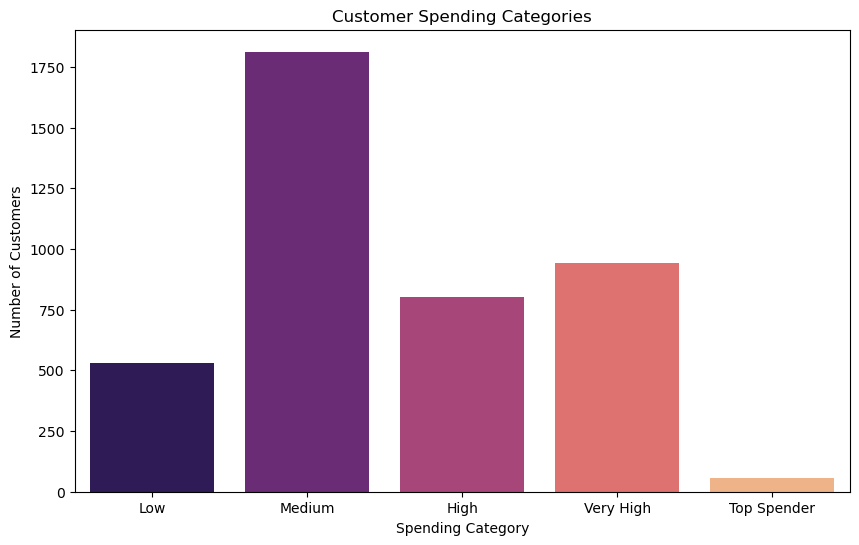

In [34]:
# Aggregate spending per customer
# Purpose: To summarize customer spending and transaction frequency.
customer_summary = online_retail_cleaned_no_cancellations_no_outliers.groupby('CustomerID').agg({
    'Sales(£)': 'sum',    # Sum total spending for each customer
    'InvoiceNo': 'count'  # Count the number of transactions (InvoiceNo) for each customer
}).rename(columns={'InvoiceNo': 'Purchase_Frequency'}).reset_index()



# Categorizing customers based on spending
# Purpose: To categorize customers based on their total spending.
customer_summary['Spending_Category'] = pd.cut(
    customer_summary['Sales(£)'],
    bins=[0, 100, 500, 1000, 5000, customer_summary['Sales(£)'].max()], # 0-100(£): Low spenders, 100-500(£): Medium spenders, 500-1000(£): High spenders, 1000-5000(£): Very High spenders, 5000(£)+: Top spenders
    labels=['Low', 'Medium', 'High', 'Very High', 'Top Spender']
)


# Analyzing the Distribution of Spending Categories
# Purpose: To count how many customers fall into each spending category.
spending_distribution = customer_summary['Spending_Category'].value_counts()

# Visualizing the Spending Categories
plt.figure(figsize=(10, 6))
sns.barplot(x=spending_distribution.index, y=spending_distribution.values, palette='magma')
plt.title('Customer Spending Categories')
plt.xlabel('Spending Category')
plt.ylabel('Number of Customers')
plt.show()


c:\Users\godwi\Downloads\Anconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


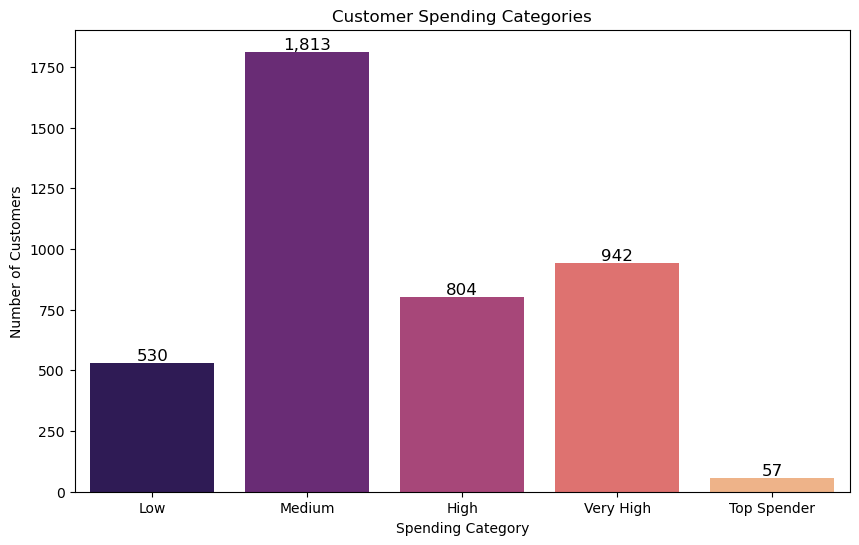

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming customer_summary and spending_distribution are already defined as in your code

# Visualizing the Spending Categories with labels
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=spending_distribution.index, y=spending_distribution.values, palette='magma')

# Adding labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.title('Customer Spending Categories')
plt.xlabel('Spending Category')
plt.ylabel('Number of Customers')
plt.show()


Finding: There are more Medium Spenders (spending between £100-500), while Top Spenders (spending over £5000) are fewer.


Reason: This reflects the natural distribution of consumer spending, where most people fall into middle income ranges and fewer make significant purchases.


Recommendation: To encourage higher spending, businesses could offer loyalty programs, exclusive discounts, or personalized promotions aimed at top spenders to increase their frequency of purchase.


In [35]:
# Add the spending category directly to the main DataFrame
customer_with_categories = customer_summary[['CustomerID', 'Sales(£)', 'Purchase_Frequency', 'Spending_Category']]

# Display the first few rows of the unified DataFrame
customer_with_categories.head()

#customer_with_categories.to_csv("customer_spending_categories.csv", index=False)


,CustomerID,Sales(£),Purchase_Frequency,Spending_Category
0,12347.0,2783.37,155,Very High
1,12348.0,90.20,6,Low
2,12349.0,939.75,57,High
3,12350.0,294.40,16,Medium
4,12352.0,1130.94,66,Very High


In [ ]:
# DataFrames for each spending category with CustomerID and relevant information
low_spenders_df = customer_summary[customer_summary['Spending_Category'] == 'Low'][['CustomerID', 'Sales(£)', 'Purchase_Frequency']]
medium_spenders_df = customer_summary[customer_summary['Spending_Category'] == 'Medium'][['CustomerID', 'Sales(£)', 'Purchase_Frequency']]
high_spenders_df = customer_summary[customer_summary['Spending_Category'] == 'High'][['CustomerID', 'Sales(£)', 'Purchase_Frequency']]
very_high_spenders_df = customer_summary[customer_summary['Spending_Category'] == 'Very High'][['CustomerID', 'Sales(£)', 'Purchase_Frequency']]
top_spenders_df = customer_summary[customer_summary['Spending_Category'] == 'Top Spender'][['CustomerID', 'Sales(£)', 'Purchase_Frequency']]

# Display the first few rows of each category
print("Low Spenders DataFrame:")
print(low_spenders_df.head())

print("\nMedium Spenders DataFrame:")
print(medium_spenders_df.head())

print("\nHigh Spenders DataFrame:")
print(high_spenders_df.head())

print("\nVery High Spenders DataFrame:")
print(very_high_spenders_df.head())

print("\nTop Spenders DataFrame:")
print(top_spenders_df.head())


### 7. Geographic Revenue Distribution


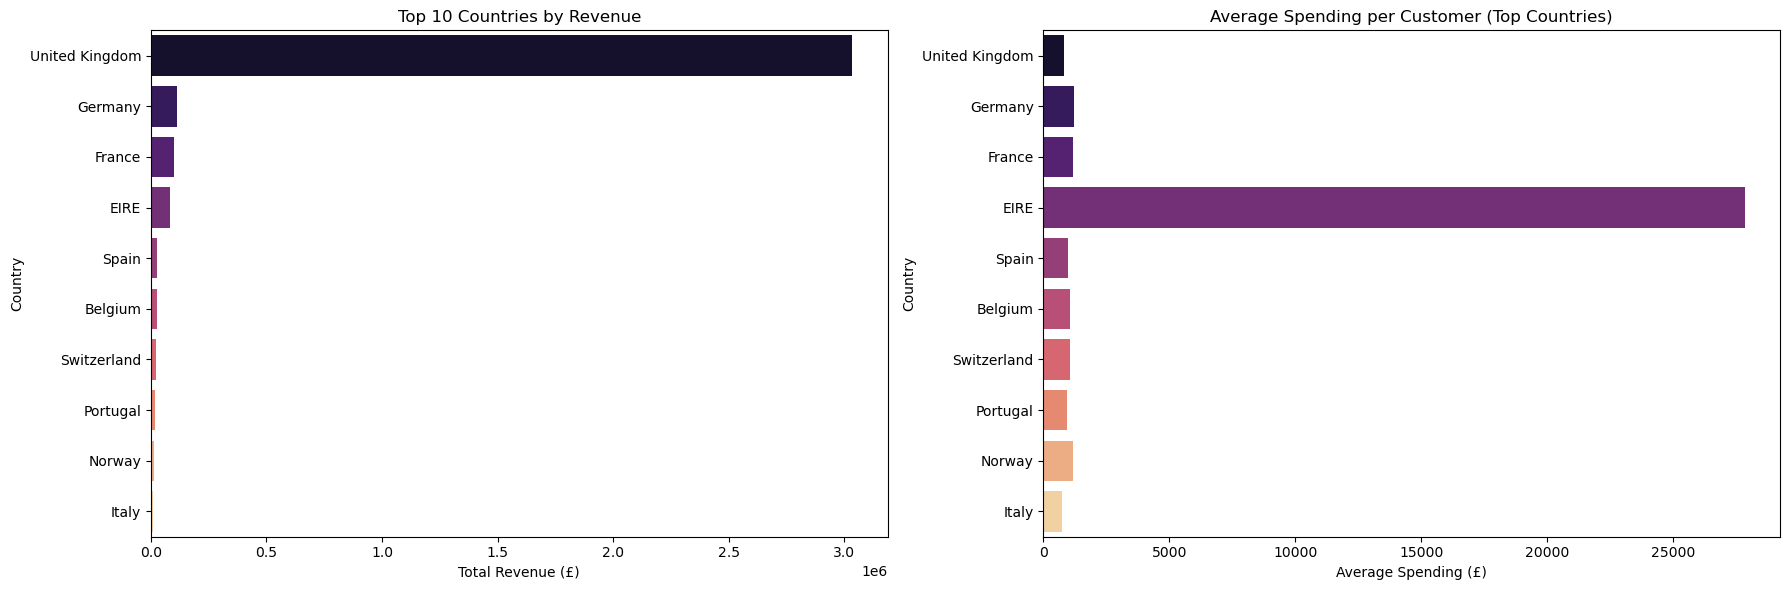

In [ ]:
# Aggregating data by Country
country_summary = online_retail_cleaned_no_cancellations_no_outliers.groupby('Country').agg({
    'Sales(£)': 'sum',
    'CustomerID': 'nunique'
}).reset_index()

# Calculating average spending per customer
country_summary['Avg_Spending_per_Customer'] = country_summary['Sales(£)'] / country_summary['CustomerID']

# Top 10 countries by revenue
top_countries = country_summary.sort_values(by='Sales(£)', ascending=False).head(10)

# Top 10 countries per customer spending
#top_countries_averge_spending_per_customer = country_summary.sort_values(by='Sales(£)', ascending=False).head(10)


# Plotting
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Revenue by Country
sns.barplot(ax=axes[0], data=top_countries, x='Sales(£)', y='Country', palette='magma')
axes[0].set_title('Top 10 Countries by Revenue')
axes[0].set_xlabel('Total Revenue (£)')
axes[0].set_ylabel('Country')

# Average Spending per Customer by Country
sns.barplot(ax=axes[1], data=top_countries, x='Avg_Spending_per_Customer', y='Country', palette='magma')
axes[1].set_title('Average Spending per Customer (Top Countries)')
axes[1].set_xlabel('Average Spending (£)')
axes[1].set_ylabel('Country')

plt.tight_layout()
plt.show()


Finding: The UK contributed the most to revenue, followed by Germany and France. In contrast, Ireland (EIRE) customers spent the most on average, followed by Iceland and Singapore.


Reason: The higher overall revenue from the UK is likely due to its larger population and customer base. On the other hand, countries like Ireland, Iceland, and Singapore may have smaller but wealthier customer segments, leading to higher average spend per customer.


Recommendation: Businesses could focus on targeted marketing campaigns for countries with high spending per customer (like Ireland and Singapore) while maintaining competitive pricing in countries with a larger customer base (like the UK).


In [ ]:
online_retail_cleaned_no_cancellations_no_outliers

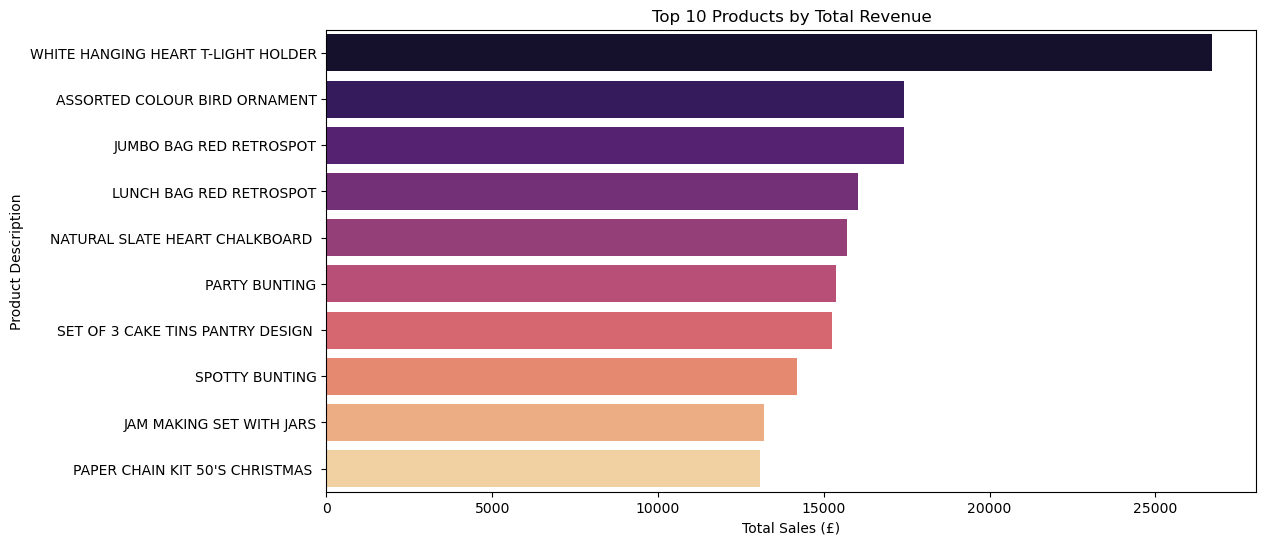

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Aggregate sales by Description
sales_by_Description = online_retail_cleaned_no_cancellations_no_outliers.groupby('Description')['Sales(£)'].sum().reset_index()
sales_by_Description.columns = ['Description', 'Sales(£)']

# Aggregate sales by region (assuming 'Country' is the region)
sales_by_region = online_retail_cleaned_no_cancellations_no_outliers.groupby('Country')['Sales(£)'].sum().reset_index()
sales_by_region.columns = ['Country', 'Sales(£)']

# Plotting Sales by Description
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales(£)', y='Description', data=sales_by_Description.sort_values(by='Sales(£)', ascending=False).head(10), palette="magma")
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Total Sales (£)')
plt.ylabel('Product Description')
plt.show()


### 8. Cancellation Rate


C:\Users\godwi\AppData\Local\Temp\ipykernel_17996\4015582524.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_data = pd.concat([online_retail_cleaned_no_cancellations_no_outliers, canceled_transactions])


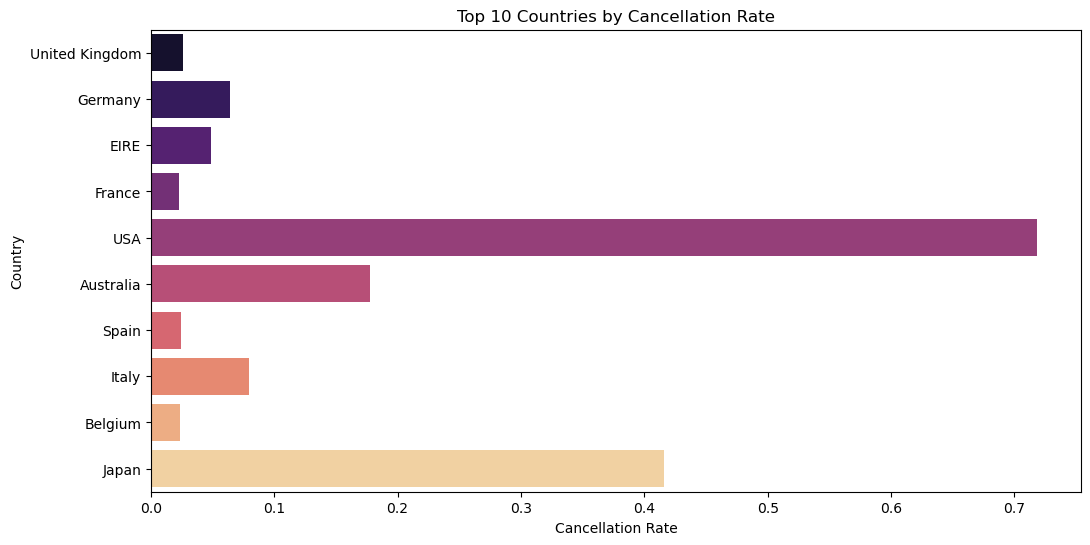

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Step 0: Combine the two DataFrames by concatenation (add the 'Sales(£)' column to canceled transactions dataframe)
canceled_transactions['Sales(£)'] = 0  # Assuming canceled transactions have no revenue

# Ensure both DataFrames have the same structure for concatenation
columns_to_keep = [
    'InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
    'UnitPrice(£)', 'CustomerID', 'Country', 'Sales(£)', 'is_canceled'
]
# Add missing columns to canceled_transactions (if necessary)
for col in columns_to_keep:
    if col not in canceled_transactions:
        canceled_transactions[col] = None

# Concatenate both DataFrames
combined_data = pd.concat([online_retail_cleaned_no_cancellations_no_outliers, canceled_transactions])

# Step 1: Aggregate revenue and cancellations by country
country_revenue = combined_data.groupby('Country').agg(
    Total_Transactions=('InvoiceNo', 'count'),  # Total number of transactions
    Total_Revenue=('Sales(£)', 'sum'),          # Sum of Sales(£)
    Total_Cancellations=('is_canceled', 'sum')  # Count of canceled transactions
).reset_index()

# Step 2: Calculate cancellation rate per country
country_revenue['Cancellation_Rate'] = country_revenue['Total_Cancellations'] / country_revenue['Total_Transactions']

# Step 3a: Rank and filter the Top 10 countries by revenue
top_countries_rev = country_revenue.sort_values(by='Total_Revenue', ascending=False).head(10)

# Step 3b: Rank and filter the Top 10 countries by Total Cancellations
top_countries_cancel = country_revenue.sort_values(by='Total_Cancellations', ascending=False).head(10)

# Step 4: Plot Cancellation Rate for Top 10 Countries
plt.figure(figsize=(12, 6))
sns.barplot(x='Cancellation_Rate', y='Country', data=top_countries_cancel, palette='magma')
plt.title('Top 10 Countries by Cancellation Rate')
plt.xlabel('Cancellation Rate')
plt.ylabel('Country')
plt.show()


Finding: The USA had the highest cancellation rate, followed by Japan and Australia, while the UK had a relatively lower cancellation rate.


Reason: High cancellation rates may reflect customer behavior, such as changing minds or finding better deals after placing an order. Countries like the USA might have more lenient return and cancellation policies, leading to higher rates.

Recommendation: To reduce cancellations, businesses could improve the customer decision-making process by providing better product descriptions, reviews, and clearer return policies to build customer trust and reduce cancellations.


### 9. High-Demand vs. Canceled Products


In [41]:
""""High-Demand Products and Cancellation Analysis:"""

'"High-Demand Products and Cancellation Analysis:'

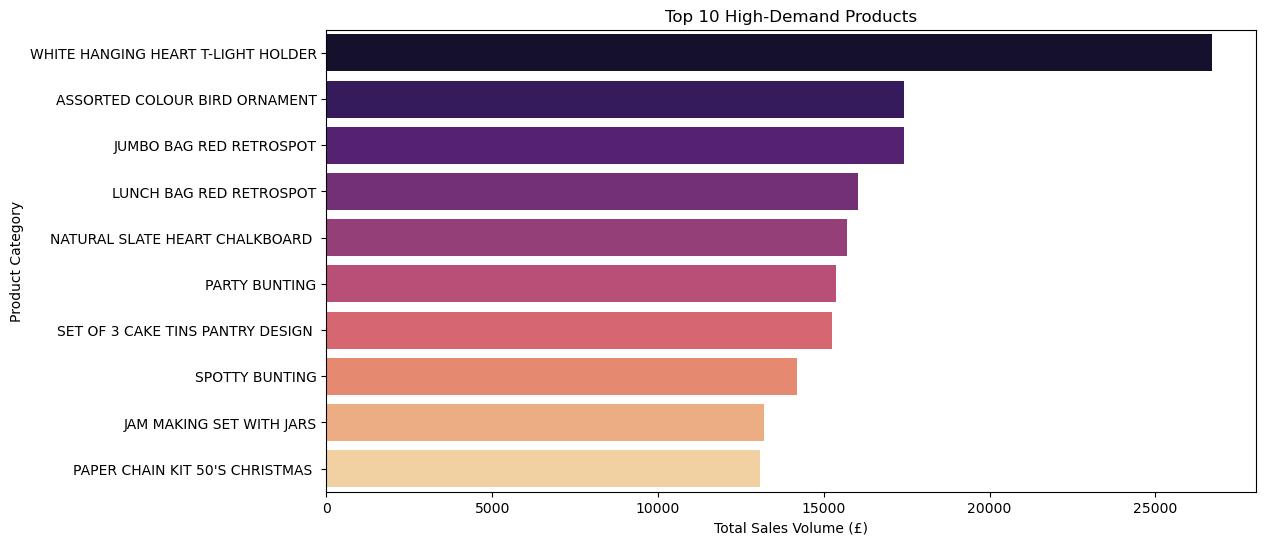

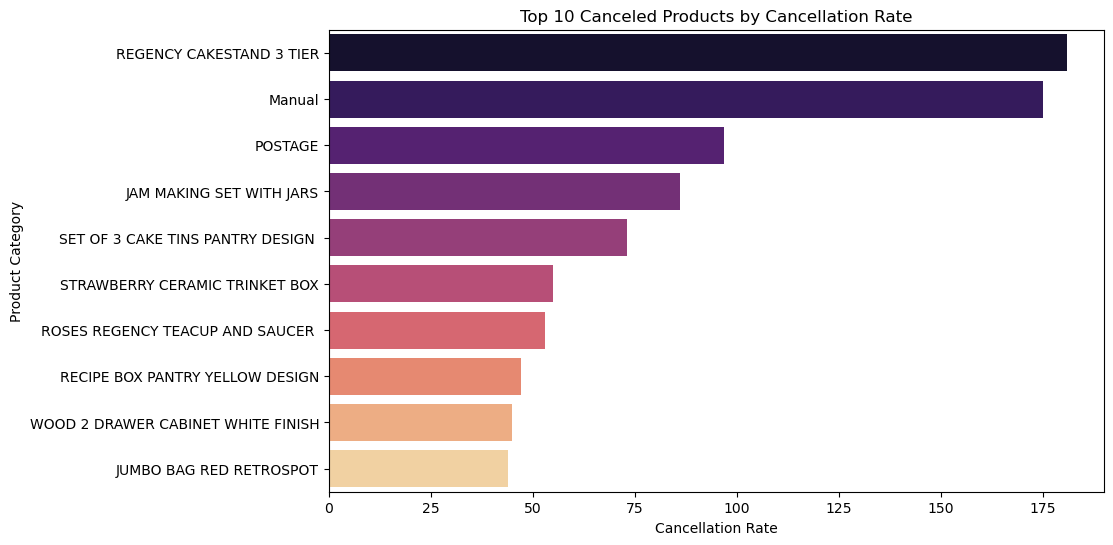

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'combined_data' has already been defined and cleaned

# Aggregate sales by product category and calculate high-demand products
product_category_sales = combined_data.groupby('Description').agg(
    Total_Sales_Volume=('Sales(£)', 'sum'),
    Total_Cancellations=('is_canceled', 'sum'),  # Count of canceled transactions
    Total_Transactions=('StockCode', 'nunique')  # Count of unique transactions per product category
).reset_index()

# Avoid division by zero when calculating Cancellation Rate
product_category_sales['Cancellation_Rate'] = product_category_sales['Total_Cancellations'] / \
    product_category_sales['Total_Transactions'].replace(0, np.nan)  # Why it's used: To prevent division by zero errors and handle cases where no transactions exist for a product. Why it's used: To prevent division by zero errors and handle cases where no transactions exist for a product.



# Sort by total sales volume for top 10 high-demand products
top_products_rev = product_category_sales.sort_values(by='Total_Sales_Volume', ascending=False).head(10)

# Sort by cancellation rate for top 10 canceled products
top_products_cancel = product_category_sales.sort_values(by='Cancellation_Rate', ascending=False).head(10)

# Plotting High-Demand Products
plt.figure(figsize=(12, 6))
sns.barplot(x='Total_Sales_Volume', y='Description', data=top_products_rev, palette="magma")
plt.title('Top 10 High-Demand Products')
plt.xlabel('Total Sales Volume (£)')
plt.ylabel('Product Category')
plt.show()

# Plotting Cancellation Rates per Product Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Cancellation_Rate', y='Description', data=top_products_cancel, palette="magma")
plt.title('Top 10 Canceled Products by Cancellation Rate')
plt.xlabel('Cancellation Rate')
plt.ylabel('Product Category')
plt.show()

Finding: The WHITE HANGING HEART T-LIGHT HOLDER remained the top product by demand, while REGENCY CAKESTAND 3 TIER had the highest cancellation rate.


Reason: The high demand for the T-light holder could be due to its popularity and appeal during the holiday season, while high cancellations for items like the Regency Cake Stand might be due to higher customer expectations or issues with product quality, availability, or shipping.


Recommendation: To reduce cancellations for high-risk products, businesses could improve product quality checks, offer clear return policies, and monitor inventory levels more carefully. Promoting high-demand products like the T-LIGHT HOLDER during peak seasons can help boost overall sales.
